# Input

A material is any of the following:

1. A text
2. A recording
3. A PDF

## Text Input

In [20]:
text_note = input("Insert text note: ")
print(text_note)

Insert text note:  wew


wew


## Recording Input

In [63]:
from transformers import pipeline
asr = pipeline("automatic-speech-recognition");

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

In [12]:
record_note = asr("audio_samples/sample-1.mp3")
record_note

{'text': 'IT IS ELEVINDIN CASIEN NISIN NORING IS ITS MILE WARE MAY SEND A LITTLE NAY IN THE GENEW WITH RAWMEN I HAD DELDA FRAIL'}

In [11]:
record_note['text'].lower()

'it is elevindin casien nisin noring is its mile ware may send a little nay in the genew with rawmen i had delda frail'

## PDF Input

In [25]:
import os

os.add_dll_directory(r"C:\Program Files\GTK3-Runtime Win64\bin")

<AddedDllDirectory('C:\\Program Files\\GTK3-Runtime Win64\\bin')>

In [27]:
# insert the GTK3 Runtime folder at the beginning. Can be bin or lib, depending on path you choose while installing.
GTK_FOLDER = r'C:\Program Files\GTK3-Runtime Win64\bin'
os.environ['PATH'] = GTK_FOLDER + os.pathsep + os.environ.get('PATH', '')

In [30]:

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [28]:
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/101971449 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [31]:
doc = DocumentFile.from_pdf("pdf_samples/pdf_sample.pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 2


In [34]:
result = predictor(doc)
print(result)

Document(
  (pages): [
    Page(
      dimensions=(1584, 1224)
      (blocks): [
        Block(
          (lines): [
            Line(
              (words): [
                Word(value='A', confidence=1.0),
                Word(value='Simple', confidence=1.0),
                Word(value='PDF', confidence=1.0),
                Word(value='File', confidence=1.0),
              ]
            ),
            Line(
              (words): [
                Word(value='This', confidence=1.0),
                Word(value='is', confidence=1.0),
                Word(value='as', confidence=0.98),
                Word(value='small', confidence=0.99),
                Word(value='demonstration', confidence=0.92),
                Word(value='pdf', confidence=0.62),
                Word(value='file', confidence=0.46),
                Word(value='-', confidence=1.0),
              ]
            ),
          ]
          (artefacts): []
        ),
        Block(
          (lines): [
            Line(
   

In [39]:
methods_and_attributes = dir(result)

# Print the list
for item in methods_and_attributes:
    print(item)

__annotations__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_children_names
_exported_keys
export
export_as_xml
extra_repr
from_dict
pages
render
show
synthesize


In [42]:
pdf_render = result.render()

cleaned_render = pdf_render.replace('\n', ' ')
print(cleaned_render)

A Simple PDF File This is as small demonstration pdf file -  justf for use in the Virtual Mechanics tutorials. More text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text.. And more text. And more text. Boring, ZZZZZ. And more text. And more text. And more text.. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. Even more. Continued on page 2. :  And more text. And more text.    Simple PDF File 2  ..continued from page 1. Yet more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. Oh, how boring typing this stuff. But not as boring as watching paint dry. And more text. And more text. And more text. Andi more text. Boring. More, al little more text. The end, andj just as well.


### Fine-tune PDF content

Remove garbage

## Image Input

In [21]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# load image from the IAM dataset
url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

C:\Users\Lyle\anaconda3\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lyle\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extr

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


C:\Users\Lyle\anaconda3\lib\site-packages\transformers\generation\utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


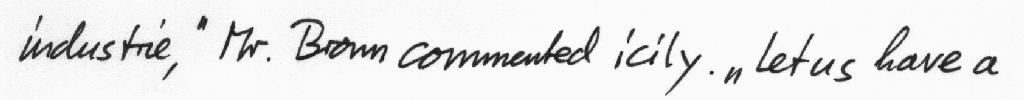

In [29]:
Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [22]:
print(generated_text)

industry, " Mr. Brown commented icily. " Let us have a


In [32]:

# load image from the IAM dataset
image = Image.open("image_samples/image_with_handwritten_text.jpg").convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(generated_text)

['0-']


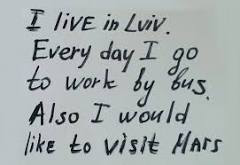

In [27]:
image

## Storing all types of material into one local database

In [ ]:
import pandas as pd

In [49]:

# Create an initial DataFrame
materials_df = pd.DataFrame(columns=['Note'])

def append_to_materials_df(new_note):
    global materials_df
    
    materials_df = materials_df.append({'Note': new_note}, ignore_index=True)



### Defining functions

In [73]:
def append_text_note():
    note = input("Insert text note: ")
    append_to_materials_df(note)
    print(f"Added note: {note}")
    
    
def append_recording_note(audio_file_path):
    note = asr(audio_file_path)['text'].lower()
    append_to_materials_df(note)
    print(f"Added note: {note}")
    
    
def append_pdf_note(pdf_file_path):
    doc = DocumentFile.from_pdf(pdf_file_path)
    result = predictor(doc)
    pdf_render = result.render()
    note = pdf_render.replace('\n', ' ')
    append_to_materials_df(note)
    print(f"Added note: {note}")
    

In [ ]:
append_text_note()

In [76]:
append_recording_note("audio_samples/sample-0.mp3")

Added note: my thought i have nobody by a beauty and will as you poured mister rochester is sub and that so don't fine sempest and devoted ta bowd to what might in a


C:\Users\Lyle\AppData\Local\Temp\ipykernel_15220\3333177615.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  materials_df = materials_df.append({'Note': new_note}, ignore_index=True)


In [74]:
append_pdf_note("pdf_samples/pdf_sample.pdf")

Added note: A Simple PDF File This is as small demonstration pdf file -  justf for use in the Virtual Mechanics tutorials. More text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text.. And more text. And more text. Boring, ZZZZZ. And more text. And more text. And more text.. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. Even more. Continued on page 2. :  And more text. And more text.    Simple PDF File 2  ..continued from page 1. Yet more text. And more text. And more text. And more text. And more text. And more text. And more text. And more text. Oh, how boring typing this stuff. But not as boring as watching paint dry. And more text. And more text. And more text. Andi more text. Boring. More, al little more text. The end, andj just as well.


C:\Users\Lyle\AppData\Local\Temp\ipykernel_15220\3333177615.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  materials_df = materials_df.append({'Note': new_note}, ignore_index=True)


In [77]:
materials_df.head()

,Note
0,this is a text note
1,adada
2,my thought i have nobody by a beauty and will ...
3,A Simple PDF File This is as small demonstrati...
4,my thought i have nobody by a beauty and will ...


# Process the notes

## Summarization

In [83]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=True))


[{'summary_text': 'Liana Barrientos, 39, has been married 10 times, nine of them between 1999 and 2002. She is believed to still be married to four men, and at one time, she was married to eight men at once. She pleaded not guilty at State Supreme Court in the Bronx on Friday.'}]


In [85]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ 
In the small village of Evermore nestled between rolling hills and ancient forests, lived a young orphan named Elara. Known for her striking emerald-green eyes and an uncanny connection to nature, Elara's presence seemed to bring a sense of tranquility to the quaint village. Yet, her mysterious past remained veiled in uncertainty, leaving the villagers to wonder about the origins of the girl with the gift.

One fateful day, as the sun dipped below the horizon, a cloaked figure arrived in Evermore, carrying tidings of a forgotten prophecy. It spoke of a chosen one, marked by the celestial alignment and possessing the power to bridge the realms of magic and reality. Whispers echoed through the village, and soon, eyes turned to Elara. Could she be the one destined to bring balance to the world?

As Elara grappled with the weight of destiny, she began to experience visions – glimpses into a magical realm that existed parallel to her own. It was a place of mythical creatures, enchanted landscapes, and a looming darkness threatening to engulf both worlds. Guided by a spectral white wolf that materialized in her dreams, Elara set forth on a quest to unravel the secrets of her past and prevent an impending catastrophe.

Her journey led her through mystical forests guarded by ancient spirits, across ethereal plains where time seemed to dance to the rhythm of a forgotten song, and into hidden caves where wise sorcerers imparted ancient knowledge. Along the way, Elara discovered the extent of her powers – the ability to communicate with creatures of the magical realm and harness the elemental forces that coursed through her veins.

Yet, the path was not without challenges. Dark forces, aware of Elara's existence, sought to extinguish the light she carried. A malevolent sorcerer named Morgrim, fueled by a thirst for dominion over both realms, emerged as the primary antagonist. Elara's encounters with Morgrim were fraught with peril, each confrontation revealing more about the connection between their destinies.

In her quest for answers, Elara encountered allies from diverse backgrounds – a charismatic rogue with a knack for illusions, a stoic elf skilled in archery and ancient lore, and a gentle healer with the power to mend both physical and spiritual wounds. Together, they formed an unlikely fellowship, bound by a shared purpose to thwart Morgrim's sinister ambitions.

As the celestial alignment drew near, tensions escalated, and the boundaries between the magical and mortal realms blurred. Elara's journey reached its climax in the heart of the mystical Eldertree, where the convergence of magic and reality would determine the fate of both worlds. In a climactic battle against Morgrim, Elara tapped into the depths of her power, guided by the spirits of the ancients and the unbreakable bonds forged with her newfound companions.

In the aftermath of the confrontation, as the sun dawned on a world forever changed, Elara found herself at the crossroads of two realms. The celestial alignment, having fulfilled its purpose, faded into memory, and the village of Evermore returned to its peaceful existence. Yet, Elara knew that her journey was far from over. With the magical realm now intricately woven into the fabric of her world, she embraced her role as a guardian of the balance between magic and reality.

And so, the Chronicles of Evermore continued, a tale etched into the annals of history, a story of magic, destiny, and the enduring power of a young girl who discovered her extraordinary purpose in the heart of an enchanting adventure.
"""

print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=True))


[{'summary_text': 'Chronicles of Evermore is a story of magic, destiny, and the enduring power of a young girl. Elara is a chosen one, marked by the celestial alignment and possessing the power to bridge the realms of magic and reality. She is guided by a spectral white wolf that materialized in her dreams.'}]


# Output